In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [126]:
df = pd.read_csv('ofertas_relampago.csv')

#### 1. Primer mirada a la data:

Comenzamos el AE revisando aspectos basicos de los datos a trabajar: 
- Cantidad de registros
- Tipos de datos 
- Datos faltantes


Comentarios: 
- Las columnas SOLD_AMOUNT y SOLD_QUANTITY tienen presencia de datos faltantes, asumiremos que no es falta de información sino que podemos reemplazar el valor nulo por 0. Para esto revisamos que las columnas no tomen el valor 0 en ninguna instancia.
- Convertimos las columnas fecha de string a datetime/date.

In [127]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'], unit='ns')
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'], unit='ns')
df['OFFER_START_DATE'] = df['OFFER_START_DATE'].astype('datetime64[D]')

In [128]:
print(df.dtypes)


print('Se tienen disponible (filas x columnas):',df.shape, )

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object
Se tienen disponible (filas x columnas): (48746, 13)


In [129]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


#### 2.  Generación de nuevas features:

Es de interés la generación de nuevas features relevantes para el análisis. Algunas de las features que podemos generar son: 
    
- OFFER_TIME: Tiempo de duración de la oferta. Diferencia entre fecha de fin y fecha de inicio.
- UNIT_PRICE: Precio unitario, lo calculamos como el cociente entre la el monto vendido y la cantidad vendida.
- SOLD_RATIO: Ratio de la cantidad de productos vendidos sobre el total de stock.
- DAY_OF_WEEK: Dia de la oferta



In [130]:
print(df.isna().sum())

#df[df['SOLD_AMOUNT'] == 0].size


df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)
df['UNIT_PRICE'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']
df['SOLD_RATIO'] = df['SOLD_QUANTITY'] / df['INVOLVED_STOCK']

df['OFFER_TIME'] = np.round((df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM'])  / pd.Timedelta(hours=1),0)
df['SOLD_RATIO'] = np.where(df['SOLD_RATIO']< 1, df['SOLD_RATIO'],
                   1) #Si se vende mas de lo disponible en stock, dejamos el ratio = 1 

df['DAY_OF_WEEK'] = df['OFFER_START_DATE'].dt.day_name()
df['HOUR_OF_DAY'] = df['OFFER_START_DTTM'].dt.hour




OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


In [131]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,UNIT_PRICE,SOLD_RATIO,OFFER_TIME,DAY_OF_WEEK,HOUR_OF_DAY
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0.786667,1.000000,7.0,Tuesday,16
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,0.00,0.0,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,NaN,0.000000,6.0,Tuesday,13
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,3.576667,0.200000,6.0,Tuesday,7
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,3.515000,0.133333,7.0,Tuesday,19
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2.643333,1.000000,3.0,Tuesday,13


####  3. Entendimiento de los datos

Es de nuestro interés entender algunos aspectos de los datos para sacar conclusiones y generar insights.
Comenzamos con un análisis de el comportamiento de las variables datetime.


- Las ofertas suelen durar entre 6 y 8 horas. Podemos observar en el boxplot que cuando se registran ofertas con menor duración suele deberse a que el stock se vendió al 100%. Por otro lado, observamos algunas ofertas con duración 0 hs y 0% stock vendido, las eliminaos de los datos ya que parecen ser casos de prueba o errores

[Text(0.5, 1.0, 'Distribución de horas de duración de las ofertas')]

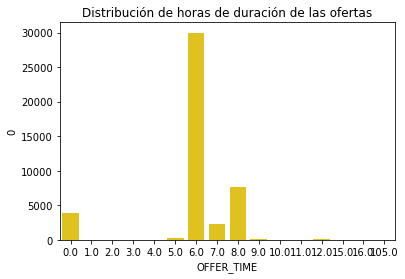

In [132]:
time = df[df['REMAINING_STOCK_AFTER_END'] > 0].groupby('OFFER_TIME').size().reset_index()

sns.barplot(data=time, x='OFFER_TIME', y=0,color='gold').set(title='Distribución de horas de duración de las ofertas')



[Text(0.5, 1.0, 'Ratio de stock vendido per cantidad de horas de oferta')]

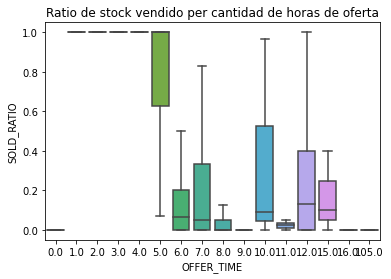

In [133]:
sns.boxplot(data=df, x="OFFER_TIME", y='SOLD_RATIO',showfliers=False).set(title='Ratio de stock vendido per cantidad de horas de oferta')


In [134]:
df_2 = df[~((df['OFFER_TIME'] == 0) & (df['SOLD_RATIO'] < 100))]

La distribución de los días de la semana para la información histórica tiene un comportamiento uniforme (*) en el tiempo. Con respecto a los horarios de inicio de la oferta, podemos localizar 3 más frecuentes: 7 hs, 13hs y 19 hs. Si mirmaos la distribución de cantidad de ventas en función a estas dos variables podemos concluir: 


- El horario de las 7 am es el que performa peor en cantidad de ventas.
- No se observan grandes cambios en la distribución del precio unitario de las ventas en función del horario y dia de la semana. 
- Mientras que durante la semana el horario de las 13 y 19 performa de igual manera, los fines de semana (viernes a domingo) parece haber una preferencia por el horario de las 19 horas, basandonos en la distribución de la cantidad total de ventas.


(*) Para esta afirmación se hizo un analisis univariado en función a la cantidad de publicaciones, sin embargo antes de sacar conclusiones para tomar decisiones deberiamos realizar un análisis multivariado para entender si existe también uniformidad en el resto de las variables (tipo de producto, tipo de envío, categoría, etc)

[Text(0.5, 1.0, 'Cantidad de publicaciones por día de la semana')]

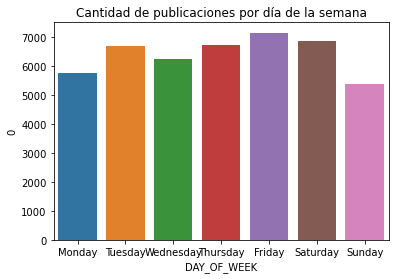

In [135]:
time = df_2.groupby('DAY_OF_WEEK').size().reset_index()

sns.barplot(data=time, x='DAY_OF_WEEK', y=0,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])\
    .set(title='Cantidad de publicaciones por día de la semana')


[Text(0.5, 1.0, 'Cantidad de publicaciones por hora de inicio de la oferta')]

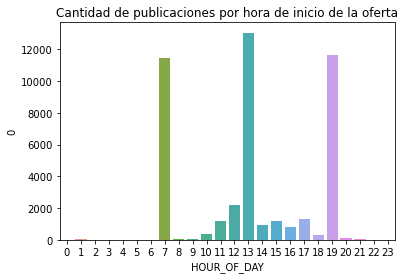

In [136]:
time = df_2.groupby('HOUR_OF_DAY').size().reset_index()

sns.barplot(data=time, x='HOUR_OF_DAY', y=0)\
    .set(title='Cantidad de publicaciones por hora de inicio de la oferta')


[Text(0.5, 1.0, 'Distribución de la cantidad de ventas en función del día de la semana y horas del día más populares')]

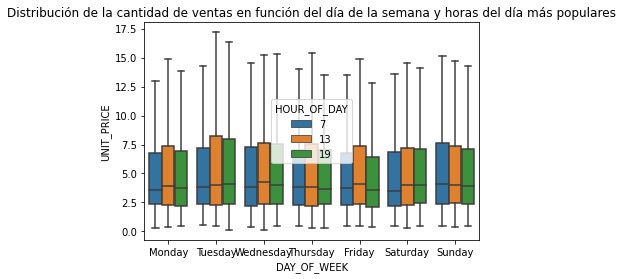

In [137]:
sns.boxplot(data=df_2[df_2['HOUR_OF_DAY'].isin([7,13,19])], x='DAY_OF_WEEK',y='UNIT_PRICE',hue='HOUR_OF_DAY', showfliers=False,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])\
      .set(title='Distribución de la cantidad de ventas en función del día de la semana y horas del día más populares')





[Text(0.5, 1.0, 'Distribución de la cantidad de ventas en función del día de la semana y horas del día más populares')]

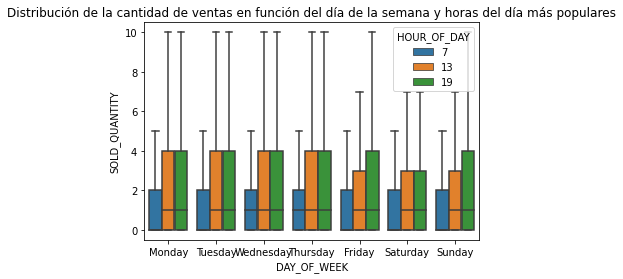

In [138]:
sns.boxplot(data=df_2[df_2['HOUR_OF_DAY'].isin([7,13,19])], x='DAY_OF_WEEK',y='SOLD_QUANTITY',hue='HOUR_OF_DAY', showfliers=False,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])\
      .set(title='Distribución de la cantidad de ventas en función del día de la semana y horas del día más populares')





En el siguiente gráfico podemos observar que la información histórica almacenada varia entre el 1 de Junio de 2021 y 1 de Agosto 2021. El periodo de tiempo es corto para analizar seasonality de la información. 

Se observa que existen algunos minimos y maximos locales en la cantidad de ofertas publicada. La distribución de las distintas categorías parece acompañar este comportamiento.

(array([18779., 18786., 18793., 18800., 18809., 18816., 18823., 18830.,
        18840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

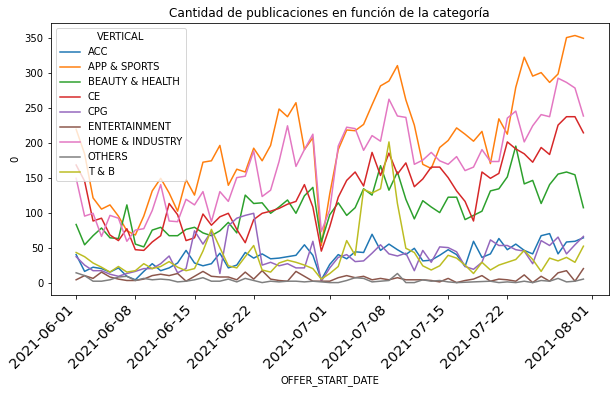

In [139]:
time_serie = df_2.groupby(['OFFER_START_DATE','VERTICAL']).size().reset_index()


plt.figure(figsize=(10,5))
plot = sns.lineplot(data=time_serie, x='OFFER_START_DATE', y=0,hue="VERTICAL").set(title='Cantidad de publicaciones en función de la categoría')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#### Distribución de los montos de los productos: 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'CPG'),
  Text(1, 0, 'OTHERS'),
  Text(2, 0, 'CE'),
  Text(3, 0, 'APP & SPORTS'),
  Text(4, 0, 'T & B'),
  Text(5, 0, 'BEAUTY & HEALTH'),
  Text(6, 0, 'HOME & INDUSTRY'),
  Text(7, 0, 'ENTERTAINMENT'),
  Text(8, 0, 'ACC')])

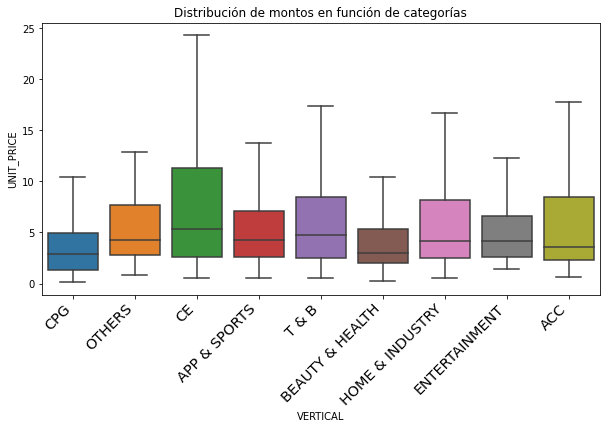

In [140]:
plt.figure(figsize=(10,5))
plot = sns.boxplot(data=df_2, x='VERTICAL', y='UNIT_PRICE',showfliers=False).set(title="Distribución de montos en función de categorías")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Sobre el tipo de envio en función de los montos, observamos que los productos que no tienen envio gratis suelen ser los de monto mas bajo. Categorizaremos entonces para el analisis los montos de los productos en 3 categorias: 

Cat 1: Productos menor a 5

Cat 2: Productos menor a 15 y mayor igual a 5

Cat 3: Productos mayor igual a 15

[Text(0.5, 1.0, 'SHIPPING TYPE SEGUN MONTO')]

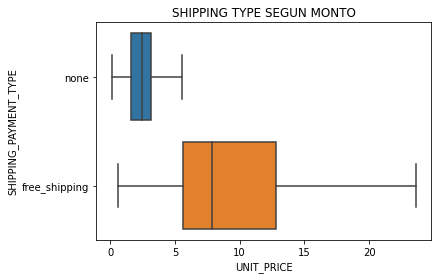

In [141]:
sns.boxplot(data=df_2, x='UNIT_PRICE', y='SHIPPING_PAYMENT_TYPE', showfliers=False).set(title='SHIPPING TYPE SEGUN MONTO')

[Text(0.5, 1.0, 'Distribución de horas de duración de las ofertas')]

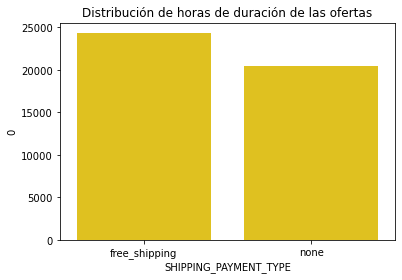

In [142]:
shipping = df_2.groupby('SHIPPING_PAYMENT_TYPE').size().reset_index()

sns.barplot(data=shipping, x='SHIPPING_PAYMENT_TYPE', y=0,color='gold').set(title='Distribución de horas de duración de las ofertas')


[Text(0.5, 1.0, 'Distribución de horas de duración de las ofertas')]

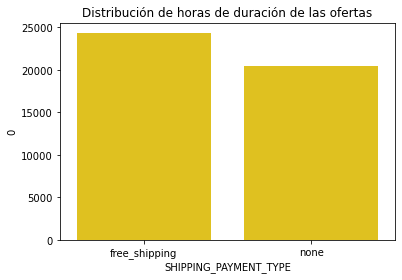

In [143]:
shipping = df_2.groupby('SHIPPING_PAYMENT_TYPE').size().reset_index()

sns.barplot(data=shipping, x='SHIPPING_PAYMENT_TYPE', y=0,color='gold').set(title='Distribución de horas de duración de las ofertas')


In [144]:
def f(row):
    if row['INVOLVED_STOCK'] < 10:
        val = 1
    elif row['INVOLVED_STOCK'] < 30:
        val = 2
    elif row['INVOLVED_STOCK'] < 100:
        val = 3
    else:
        val = 4
    return val


df_2['CATEGORY_STOCK'] = df_2.apply(f, axis=1)

<ipython-input-144-ca1bf060ed1c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CATEGORY_STOCK'] = df_2.apply(f, axis=1)


In [145]:
def f(row):
    if row['UNIT_PRICE'] < 5:
        val = 1
    elif row['UNIT_PRICE'] < 15:
        val = 2
    else:
        val = 3
    return val


df_2['CATEGORY_PRICE'] = df_2.apply(f, axis=1)

<ipython-input-145-05c31cf52929>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CATEGORY_PRICE'] = df_2.apply(f, axis=1)


In [146]:
df_2.groupby('CATEGORY_PRICE').size()

CATEGORY_PRICE
1    14609
2     7402
3    22788
dtype: int64

[Text(0.5, 1.0, 'Distribución de horas de duración de las ofertas')]

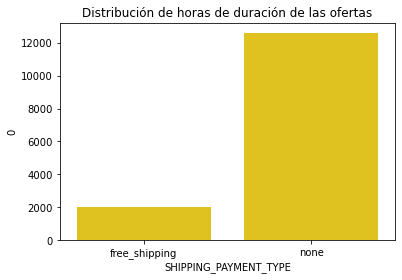

In [147]:
shipping = df_2[df_2['CATEGORY_PRICE'] == 1].groupby('SHIPPING_PAYMENT_TYPE').size().reset_index()

sns.barplot(data=shipping, x='SHIPPING_PAYMENT_TYPE', y=0,color='gold').set(title='Distribución de horas de duración de las ofertas')


El envio gratis no parece tener un impacto en el ratio de ventas.

[Text(0.5, 1.0, 'Distribución de proporcion de ventas en función del tipo de envío y qty de stock disponible')]

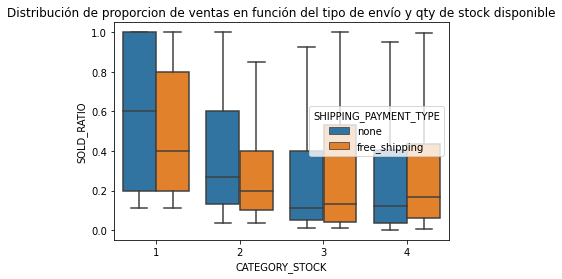

In [149]:
sns.boxplot(data=df_2[df_2['CATEGORY_PRICE'] == 1], x='CATEGORY_STOCK', y='SOLD_RATIO',hue='SHIPPING_PAYMENT_TYPE', showfliers=False)\
    .set(title='Distribución de proporcion de ventas en función del tipo de envío y qty de stock disponible')

Nos interesa evaluar el impacto del precio en la cantidad de ventas. Sin embargo, para esto categorizamos los productos en funcion del stock disponible en 4 categorías para analizar pequeños, medianos y grandes comerciantes de manera separada. 

Al hacer esto podemos observar que las ofertas relampago parecen performar mejor (vender mayor % de stock) para productos de precio unitario menor. 

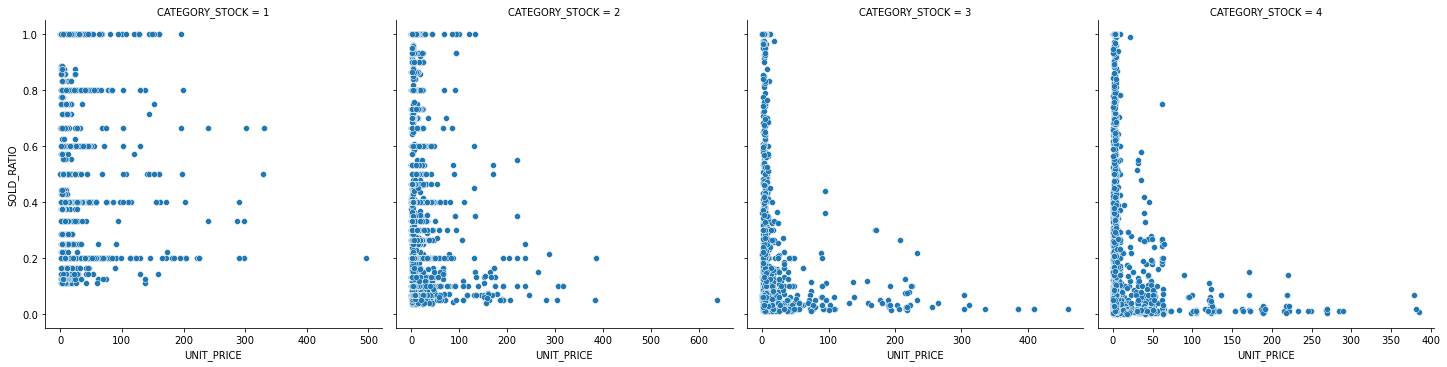

In [150]:
sns.relplot(data=df_2, x='UNIT_PRICE', y= 'SOLD_RATIO', col= 'CATEGORY_STOCK', kind = 'scatter',
             facet_kws=dict(sharex=False))

#### 4. Modelado multivariado de los datos (Next steps) 

Luego de entender como se comportan las variables involucradas en el analisis y extraer algunas conclusiones, se podría implementar algun algoritmo para tratar de predecir la variable de interés, en este caso, la variable de respuesta sería la cantidad de ventas y las variables explicativas las variables categóricas (utilizando one-hot-encodding x ej) y numéricas del dataset y las generadas en las instancias anteriores. 
